# Detección de Idiomas - Naive Bayes

### Importar librerías

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

### Cargar el dataset

In [7]:
df = pd.read_csv("dataset/updated_language_detection.csv")
df.describe()

,Text,Language
count,21821,21821
unique,21821,22
top,aprilie sonda spațială messenger a nasa și-a ...,Japanese
freq,1,1000


### Dividir el dataset en conjuntos de entrenamiento y prueba

Se utiliza stratify para mantener la proporción de clases en los conjuntos de entrenamiento y prueba.

In [8]:
X = df['Text']
y = df['Language']

X_train, X_test, y_train, y_test = train_test_split(df['Text'], df['Language'], test_size=0.2, random_state=42, stratify=df['Language'])
X_train.shape, X_test.shape, y_train.shape, y_test.shape

### Convertir texto a Bag of Words

In [9]:
vectorizer = CountVectorizer()
X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.transform(X_test)

### Entrenar el modelo

In [10]:
nb_model = MultinomialNB()
nb_model.fit(X_train_bow, y_train)

MultinomialNB()

### Evaluar el modelo

In [11]:
y_pred = nb_model.predict(X_test_bow)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9690721649484536

Classification Report:
               precision    recall  f1-score   support

      Arabic       1.00      1.00      1.00       199
     Chinese       0.75      0.80      0.77       200
       Dutch       0.97      0.97      0.97       199
     English       0.81      1.00      0.89       200
    Estonian       1.00      1.00      1.00       200
      French       0.96      1.00      0.98       198
       Hindi       0.99      0.99      0.99       197
  Indonesian       1.00      0.98      0.99       194
    Japanese       0.98      0.63      0.77       200
      Korean       1.00      0.99      1.00       200
       Latin       0.96      0.98      0.97       190
     Persian       1.00      1.00      1.00       200
   Portugese       0.99      1.00      1.00       199
      Pushto       1.00      1.00      1.00       197
    Romanian       1.00      1.00      1.00       200
     Russian       0.99      0.99      0.99       200
     Spanish       0.98    

#### Matriz de Confusión

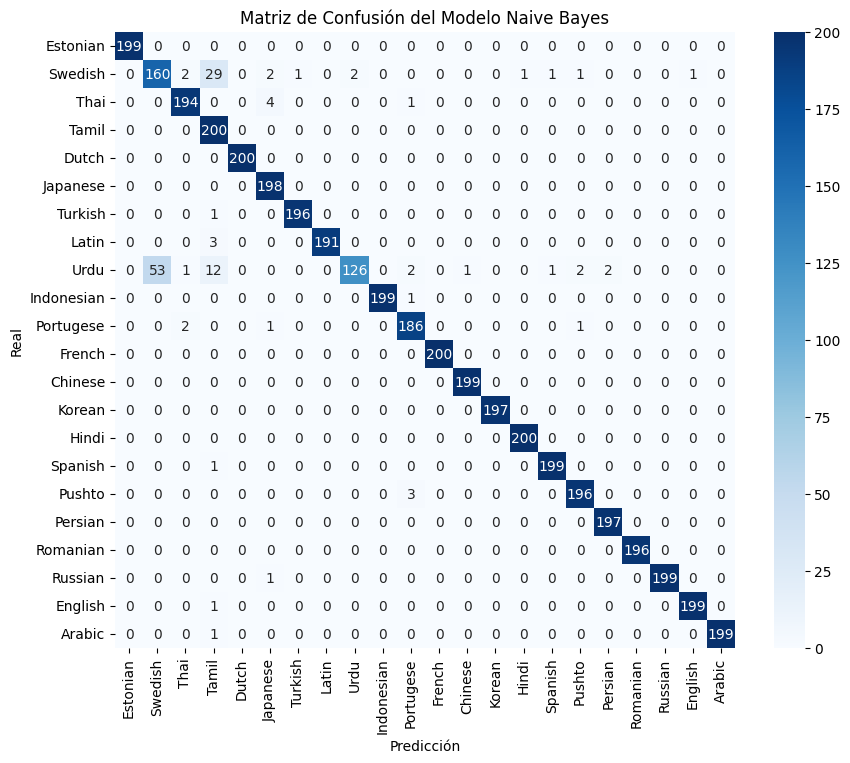

<Figure size 640x480 with 0 Axes>

In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=df['Language'].unique(), yticklabels=df['Language'].unique())
plt.title("Matriz de Confusión del Modelo Naive Bayes")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()
plt.savefig("plots/nb_confusion_matrix.png")

Luego de analizar la matriz de confusión, se detectó que muchos idiomas eran predecidos como tamil, a pesar de ser muy distintos a este idioma. Gracias a esto, se detectó que los textos de este idioma incluían menciones o partes de su texto en otros idiomas, algunos incluso directamente en otros idiomas. A continuación se identifican los mismos y se reemplazan por su traducción correspondiente.

#### Curva ROC

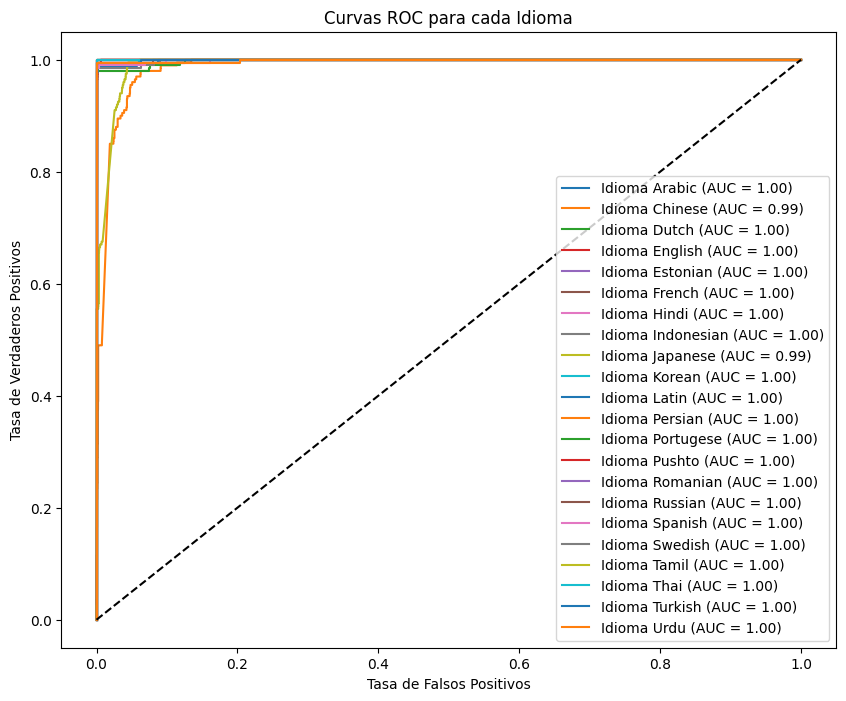

<Figure size 640x480 with 0 Axes>

In [13]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
y_bin = lb.fit_transform(y_test)

y_prob = nb_model.predict_proba(X_test_bow)

plt.figure(figsize=(10, 8))
for i in range(len(df['Language'].unique())):
    fpr, tpr, _ = roc_curve(y_bin[:, i], y_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Idioma {lb.classes_[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curvas ROC para cada Idioma')
plt.legend(loc="lower right")
plt.show()
plt.savefig("plots/nb_roc_curves.png")